<h1 style="text-align:center;font-size:40px; color:#0000FF; font-family: 'Arial', sans-serif; font-weight: bold;">
    Telecom Customer Churn Classification
</h1>
<br>
<br>
<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve
from sklearn .metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

### Functions


In [2]:
def check_duplicates(df):
    duplicate_rows = df[df.duplicated()]

    if not duplicate_rows.empty:
        print("Total duplicate rows:", len(duplicate_rows))
        for column in df.columns:
            print(f"Number of duplicates in {column}: {df[column].duplicated().sum()}")
    else:
        print("No duplicates found!")

In [3]:
def continious_var(df):
    quant_Col =[]
    for var in df.columns : 
        if (df[var].dtype == np.float64) | (df[var].dtype == np.int64) :  
            quant_Col.append(var)
    return quant_Col


In [4]:
def category_var(df):
    qual_Col = []  
    for var in df.columns:
        if (df[var].dtype == object) or (df[var].dtype.name == 'category') or (df[var].dtype == bool):
            qual_Col.append(var)
    return qual_Col

In [5]:
def draw_categorical_plot(data, figsize=(8, 6), colors=None):
    
    if not isinstance(data, pd.Series):
        raise ValueError("Input data should be a categorical data.")
    
    # Count the occurrences of each category in the data
    counts = data.value_counts()
    
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    
    # If there are less than 6 unique observations, draw a pie chart
    if len(counts) <= 5:
        counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=ax)
        ax.set_title("Pie Chart of " + data.name)
        ax.set_ylabel("")  # This is to remove the column name from the side of the pie chart
    else:
        # Otherwise, draw a bar chart
        sns.barplot(x=counts.index, y=counts.values, palette=colors, ax=ax)
        ax.set_title("Bar Chart of " + data.name)
        ax.set_ylabel("Count")
    
    plt.tight_layout()
    plt.show()  # Display the plot

In [6]:
def plot_data(df, numeric_col, category_col=None):
    plt.figure(figsize=(10, 8))
    
    # Plotting histogram using seaborn
    sns.histplot(data=df, x=numeric_col, kde=True, hue=category_col)
    
    plt.title(f'Distribution of {numeric_col}')
    plt.ylabel('Frequency')
    plt.xlabel(numeric_col)
    plt.show()

In [7]:

def boxplot(df,col):
   
    plt.figure(figsize=(6, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plots for {col}')
    plt.xticks(rotation=45)
    plt.show()

In [8]:
def detect_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    #print(f"Number of outliers in '{column}': {outliers.shape[0]}")
    
    # Display only the first few rows of outliers for readability
   

    return outliers

### 

<span style="color:#FF8C00; font-size:35px"><b> 1. Business Understanding </b> </span><br>


<span style="color:#008080; font-size:20px">
    <b>Telecom Customer Churn</b>
</span>, 
<span style="color:black; font-size:20px">
    refers to the phenomenon of customers discontinuing their subscriptions with a telecom provider. In this highly competitive sector, churn is a major challenge that directly impacts revenue and operational stability. Understanding the reasons behind customer churn is critical for retaining customers and ensuring sustained business growth.
</span>
<br><br>
<span style="color:black; font-size:20px">
    The datasets, <b>churn-bigml-20.csv</b> and <b>churn-bigml-80.csv</b>, provide extensive data about customer demographics, service usage patterns, account details, and churn status. This project leverages these datasets to identify patterns and trends associated with churn, empowering telecom companies to enhance service quality and devise effective retention strategies. By analyzing both numerical and categorical features, the project addresses a binary classification problem in the context of imbalanced data.
</span>
<br><br>
<span style="color:#008080; font-size:20px">
    <b>Business Objective : </b>
</span>
<span style="color:black; font-size:20px">
    To minimize customer churn, increase retention, and improve customer trust and loyalty.
</span>
<br><br>
<span style="color:#008080; font-size:20px">
    <b>Data Science Objective : </b>
</span>
<span style="color:black; font-size:20px">
    To preprocess and analyze the datasets, develop predictive models for churn classification, and generate actionable insights to aid in strategic decision-making.
</span>
<br>


 <span style="color:#FF8C00; font-size:35px"><b> 2. Data Understanding </b> </span><br>

In [9]:
data1 = pd.read_csv("churn-bigml-80.csv")
data2 = pd.read_csv("churn-bigml-20.csv")

In [10]:
data = pd.concat([data1, data2], ignore_index=True)

In [11]:
print('The First 5 rows in the dataset:')
data.head(5)

The First 5 rows in the dataset:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
print('The Columns of the dataset:')
data.columns

The Columns of the dataset:


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [13]:
print('Data type for each column:')
data.info()

Data type for each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night c

In [14]:
print('Uniquenes of each column:')
data.nunique()

Uniquenes of each column:


State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [15]:
print('This is the Shape of the data',data.shape)

This is the Shape of the data (3333, 20)


In [16]:
# the number of missing values for each feature
missing_values = data.isnull().sum()

# Filter out features without missing values
missing_values = missing_values[missing_values > 0]

# Display missing values
if not missing_values.empty:
    print("Number of missing values for each feature:")
    print(missing_values)
else:
    print("No missing values detected in the dataset!")

No missing values detected in the dataset!


Checking missing Values by plotting Heatmap


<Axes: >

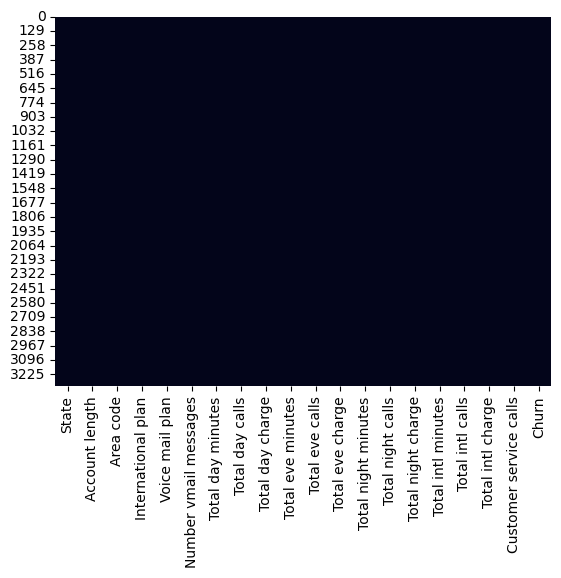

In [17]:
print("Checking missing Values by plotting Heatmap")
sns.heatmap(data.isnull(), cbar=False)

In [18]:
print('Description of the Categorical Dataset:')
data.describe(include=['object', 'bool']).T

Description of the Categorical Dataset:


,count,unique,top,freq
State,3333,51,WV,106
International plan,3333,2,No,3010
Voice mail plan,3333,2,No,2411
Churn,3333,2,False,2850


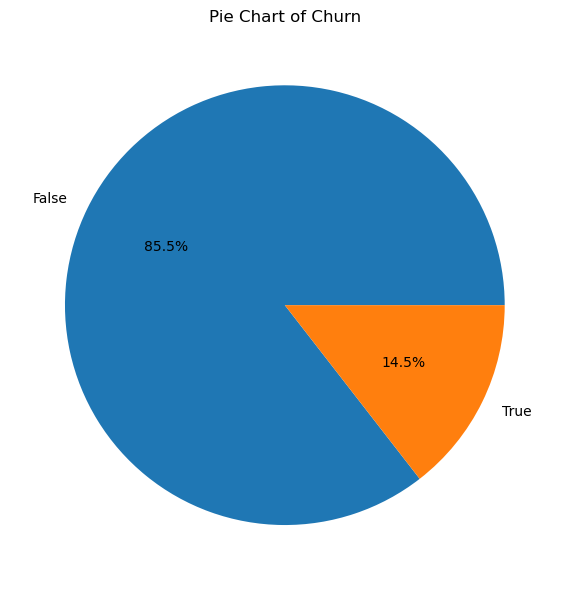

In [19]:
draw_categorical_plot(data['Churn'])

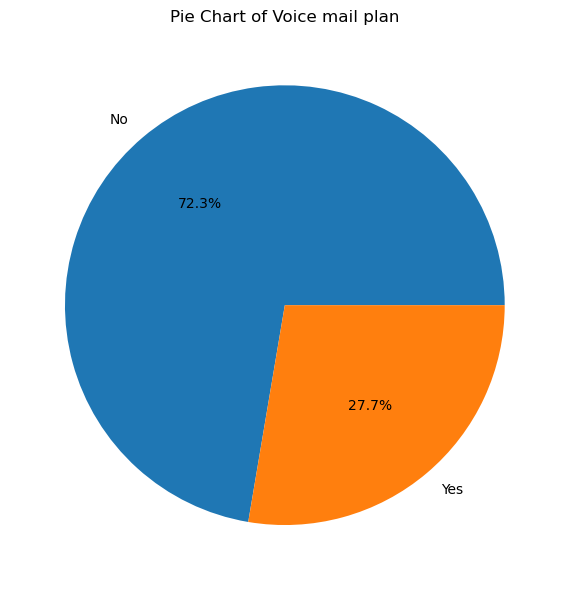

In [20]:
draw_categorical_plot(data['Voice mail plan'])

<Axes: xlabel='Voice mail plan', ylabel='count'>

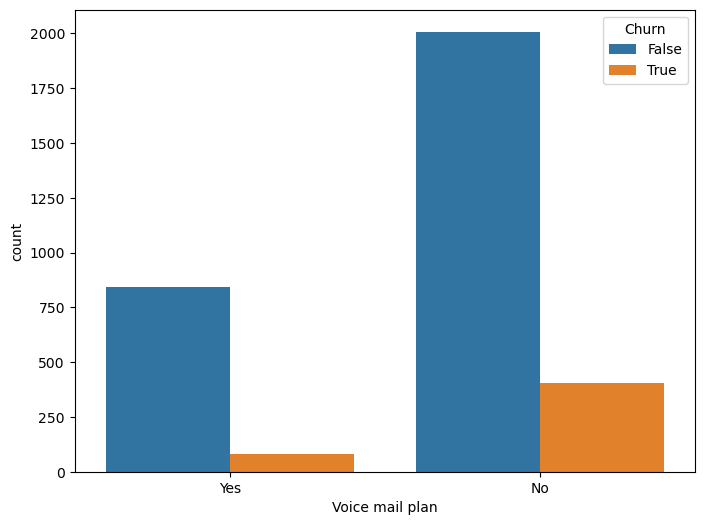

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x = 'Voice mail plan', hue = 'Churn')

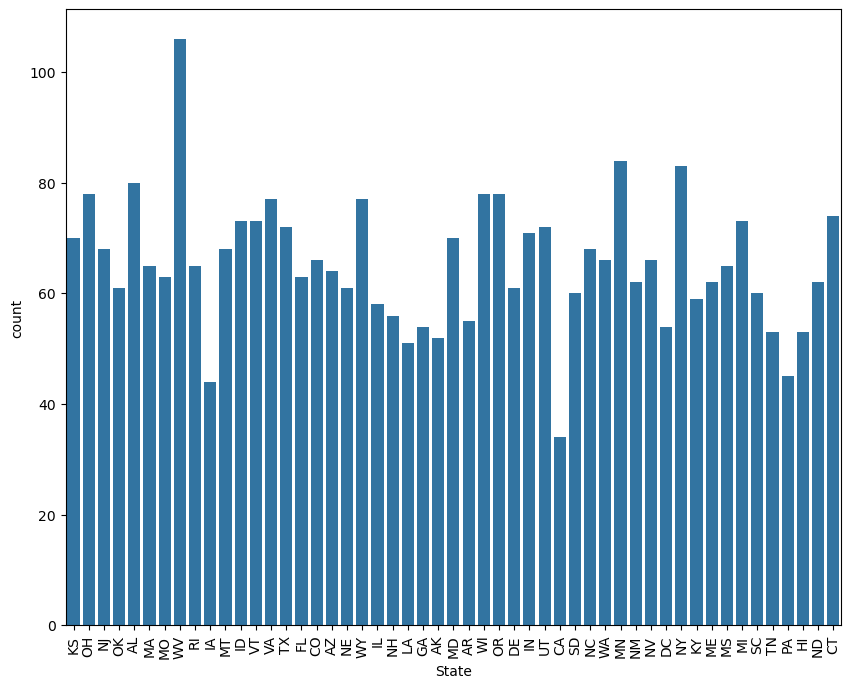

In [22]:
plt.figure(figsize=(10, 8))
sns.countplot(x='State', data=data)
plt.xticks(rotation=90)
plt.show()

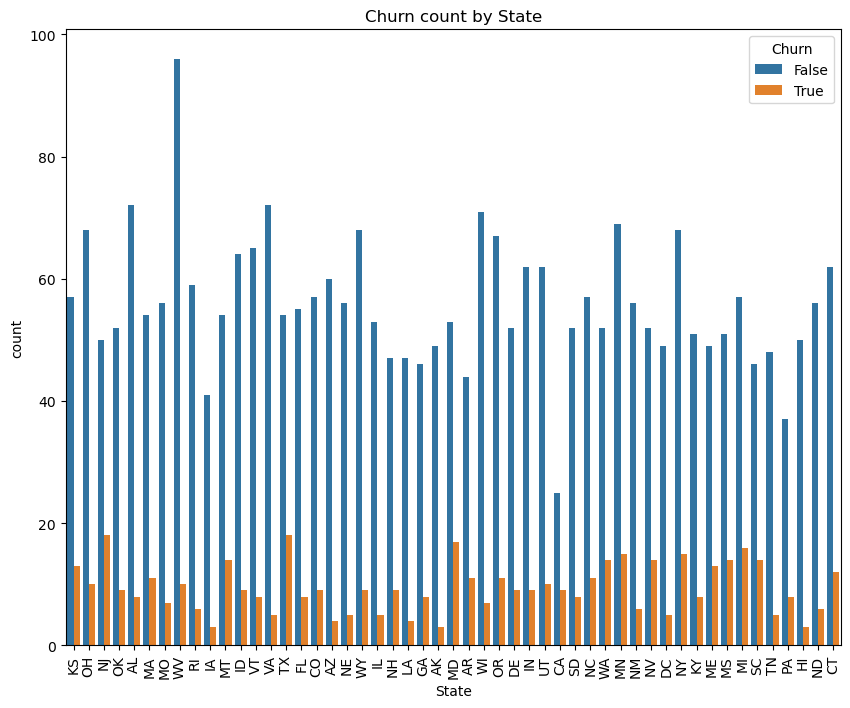

In [23]:
plt.figure(figsize=(10, 8))
sns.countplot(x='State', hue='Churn', data=data)
plt.xticks(rotation=90)
plt.title(f'Churn count by State')
plt.show()

In [24]:
quant_Col=continious_var(data)
print("Quantitative Variables")
print(quant_Col)  

Quantitative Variables
['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


In [25]:
qual_Col=category_var(data)
print("Qualitative Variables")
print(qual_Col)  

Qualitative Variables
['State', 'International plan', 'Voice mail plan', 'Churn']


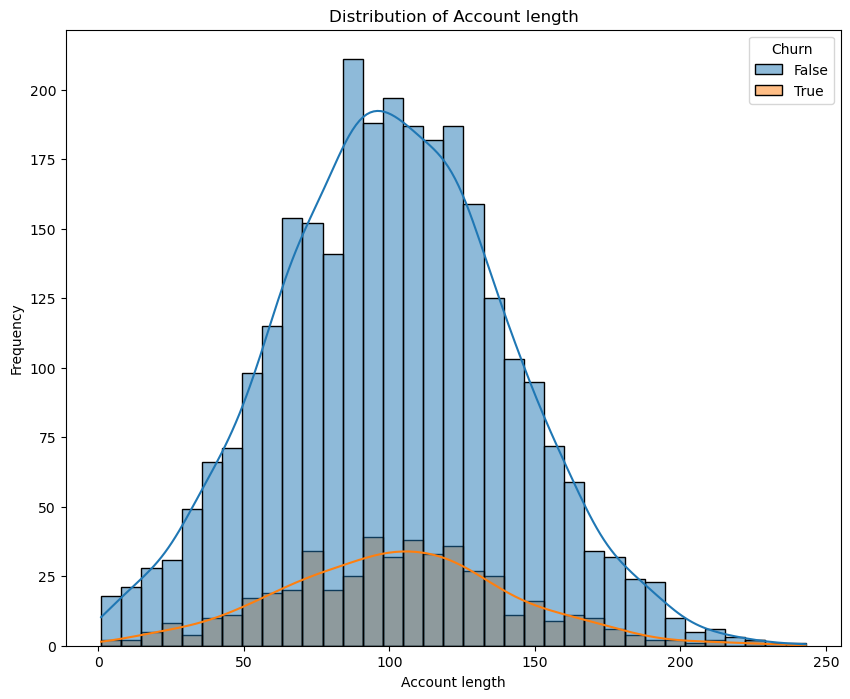

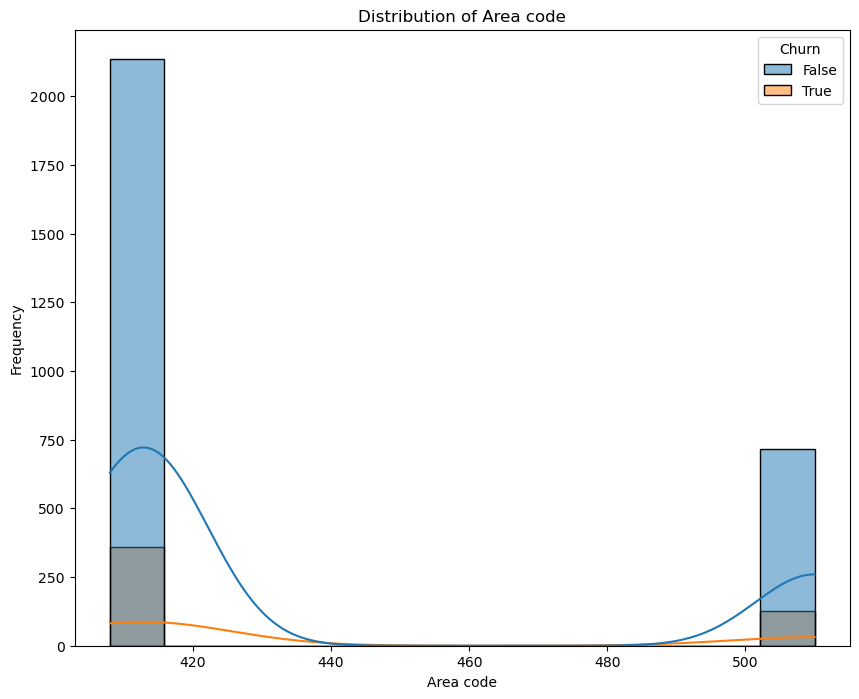

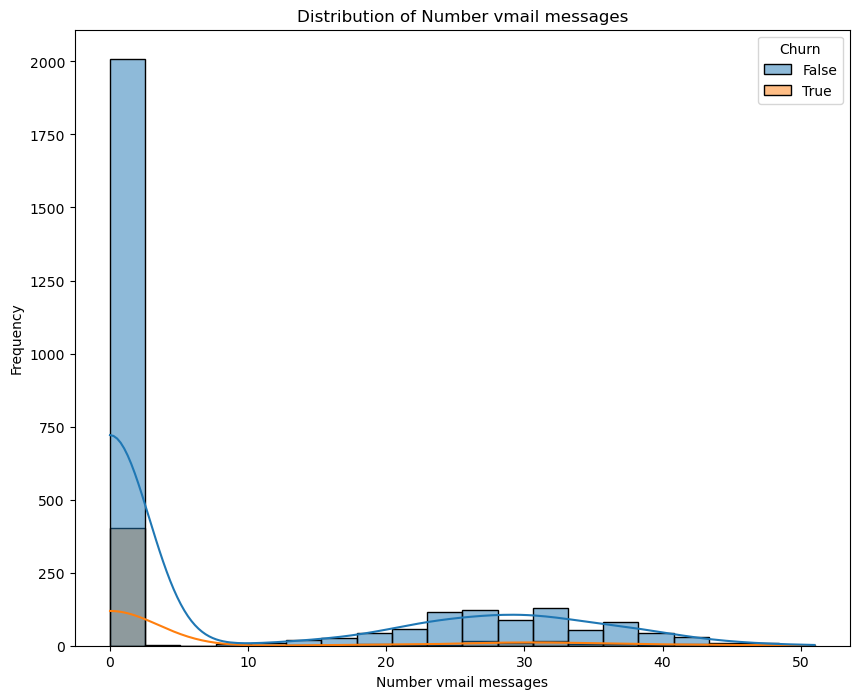

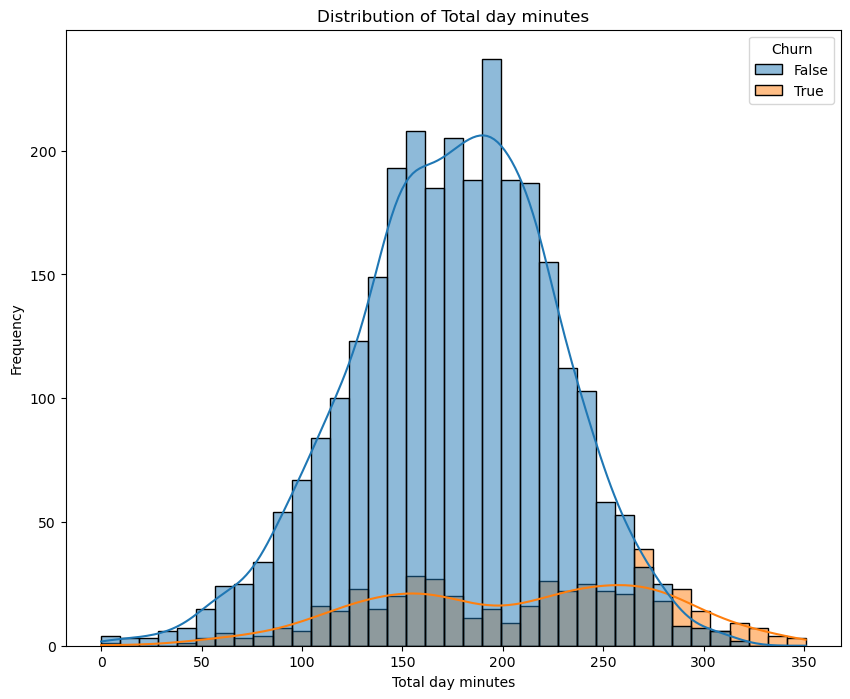

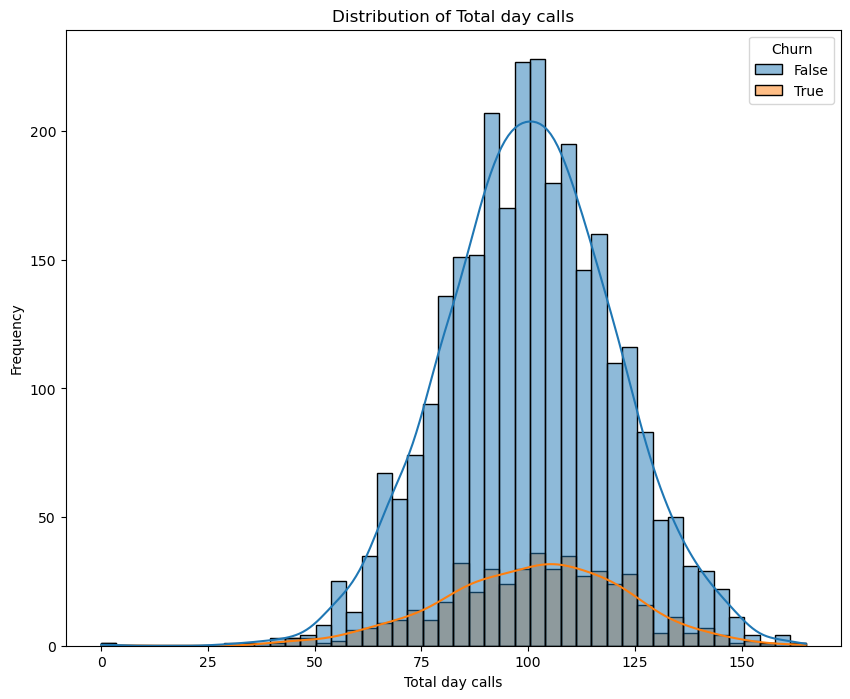

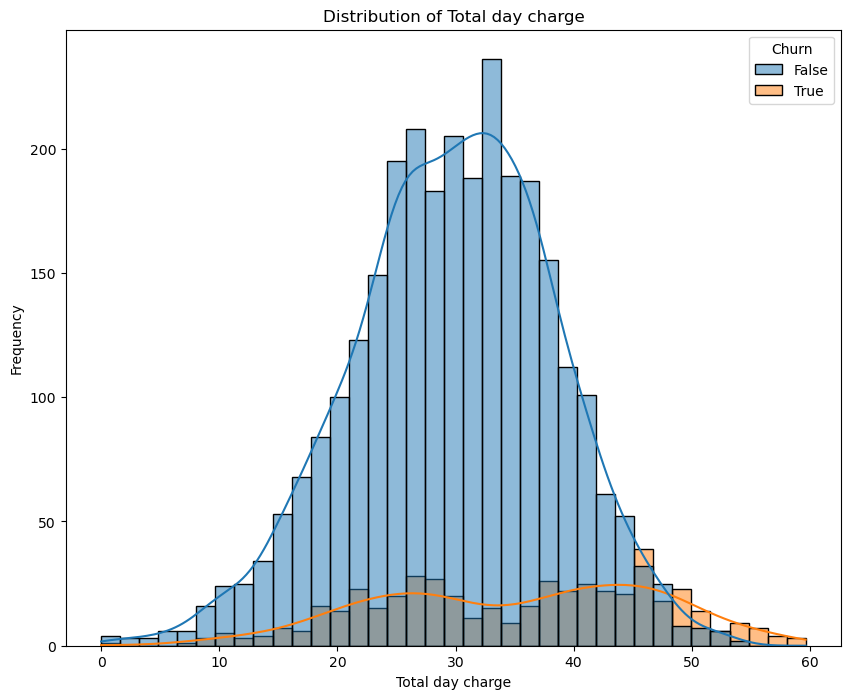

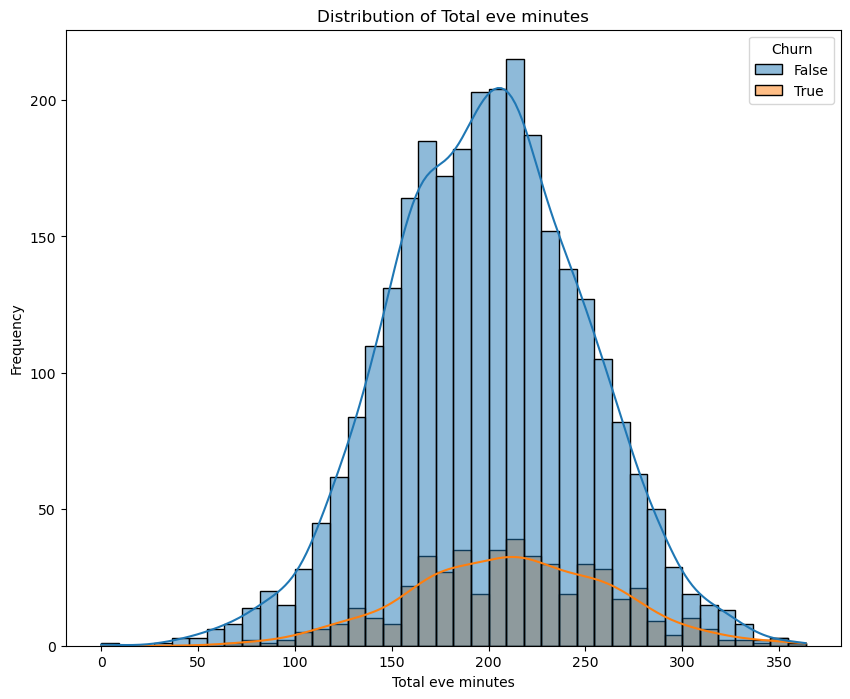

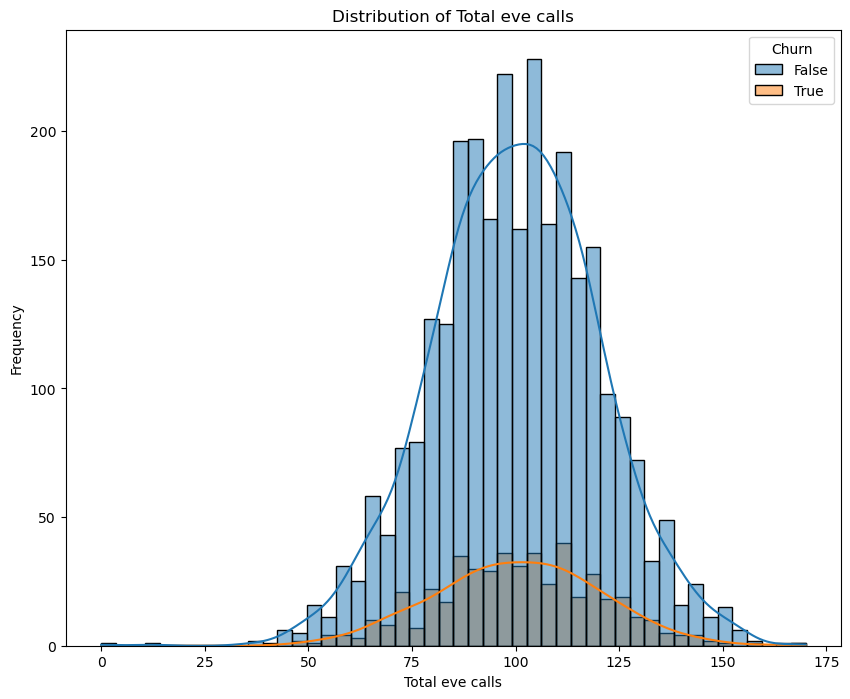

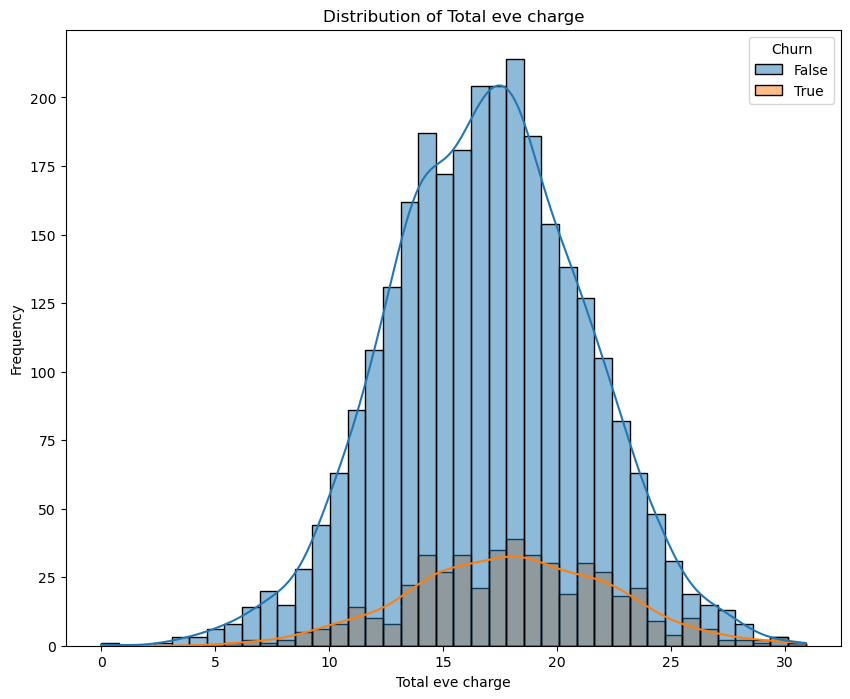

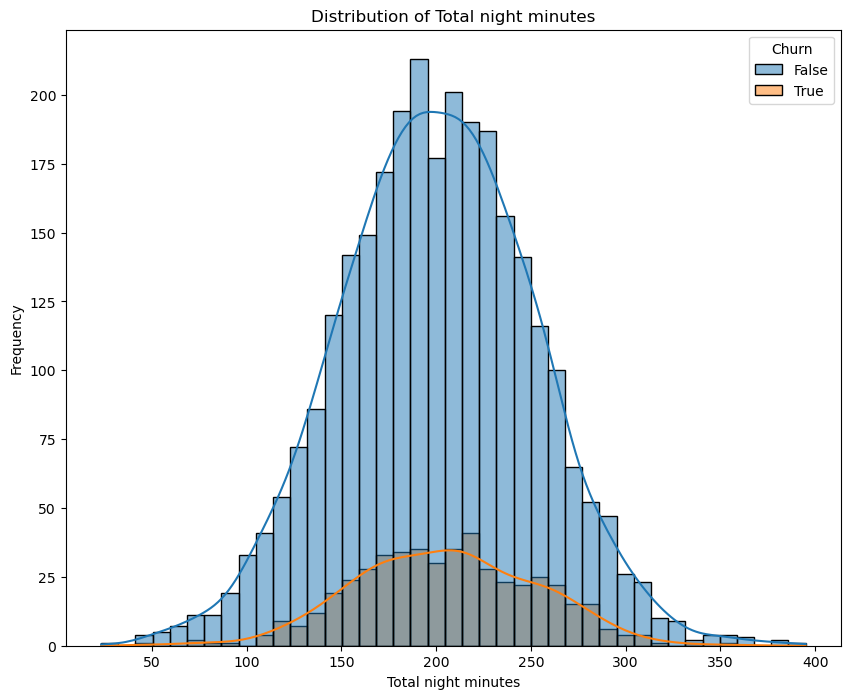

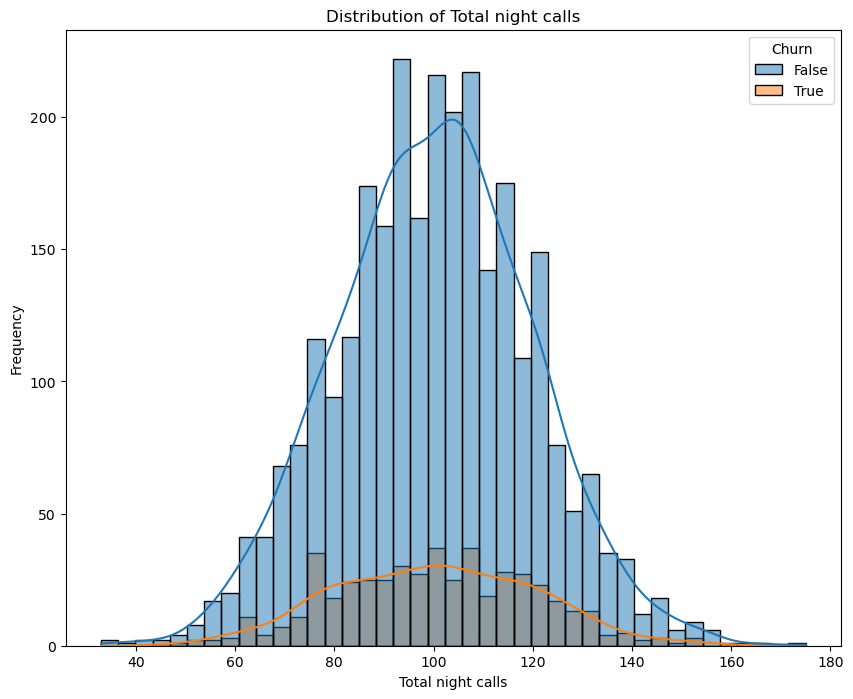

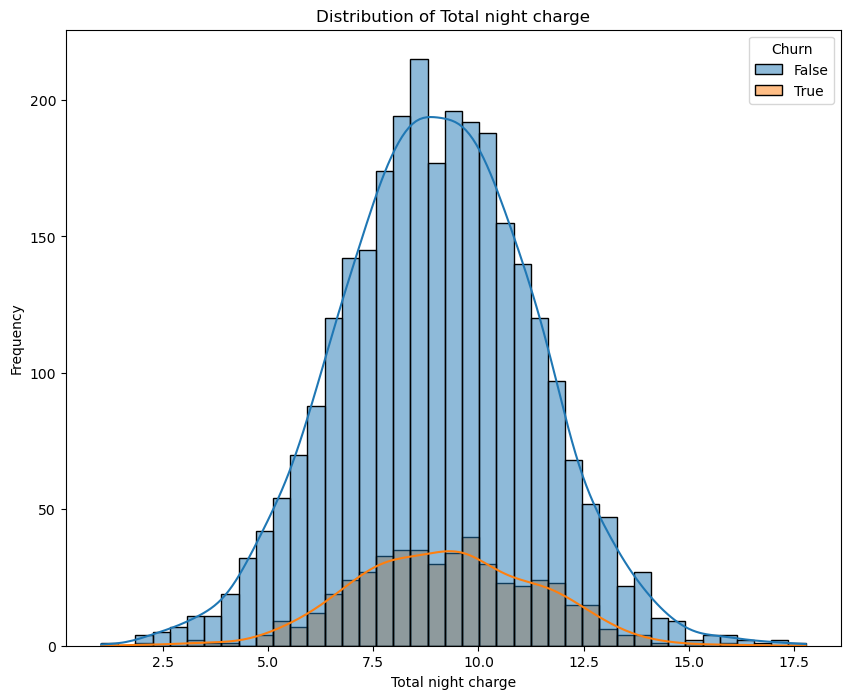

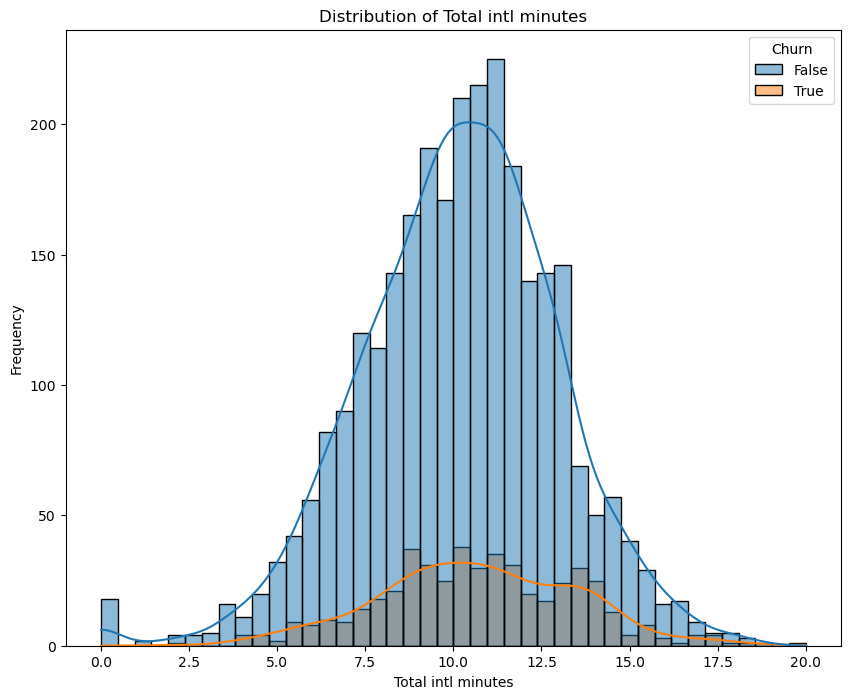

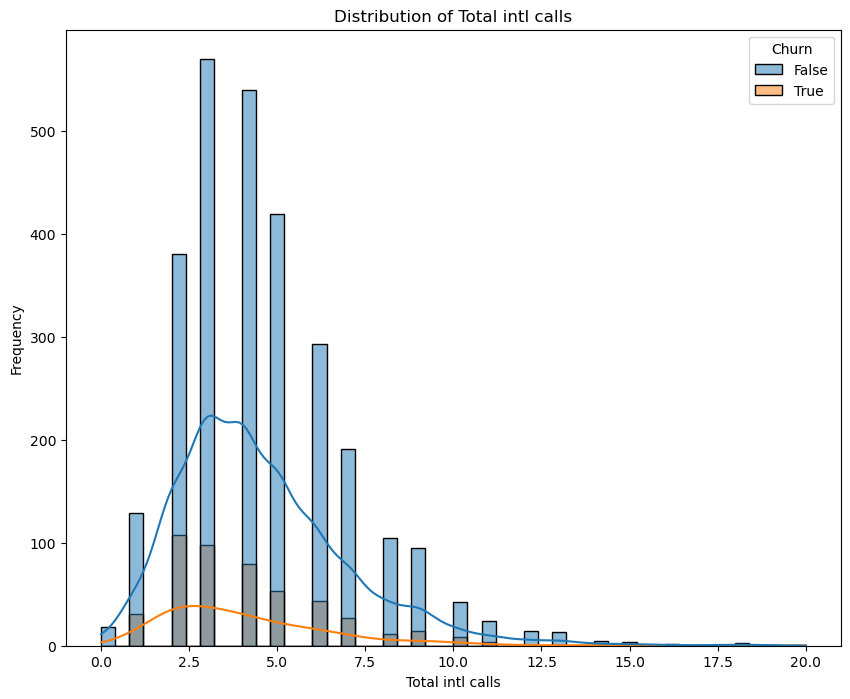

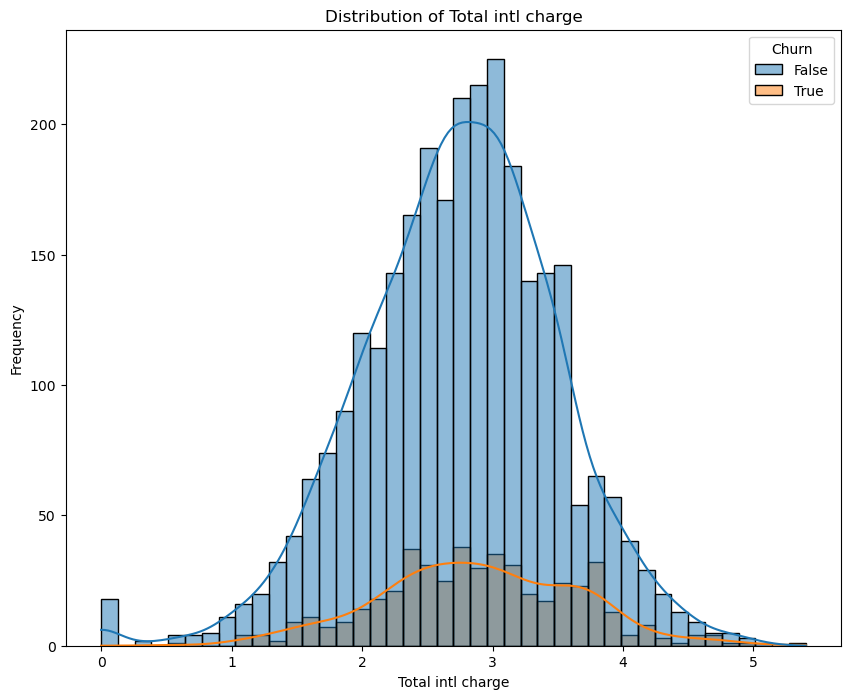

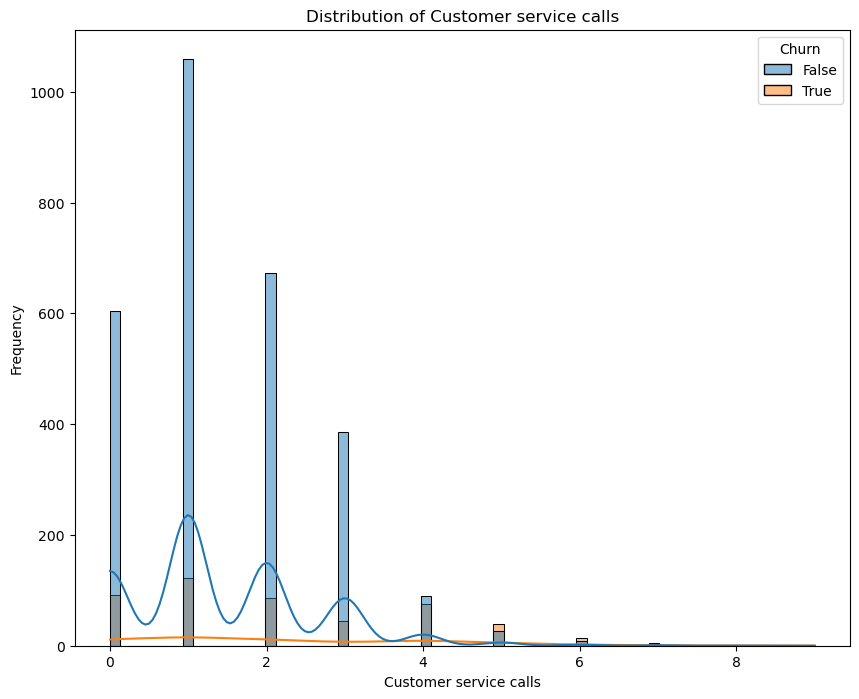

In [26]:
for var in quant_Col:
    plot_data(data, var, 'Churn')

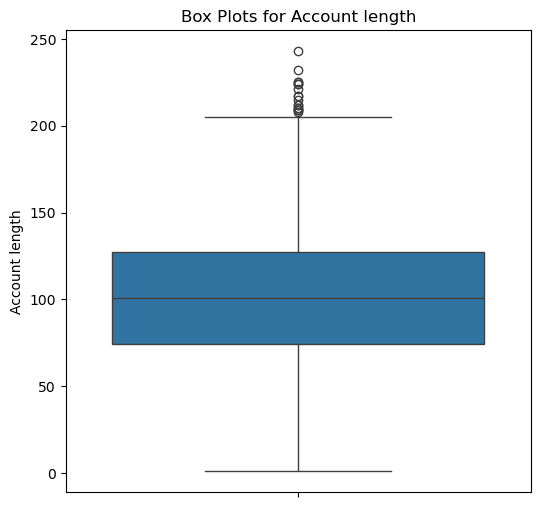

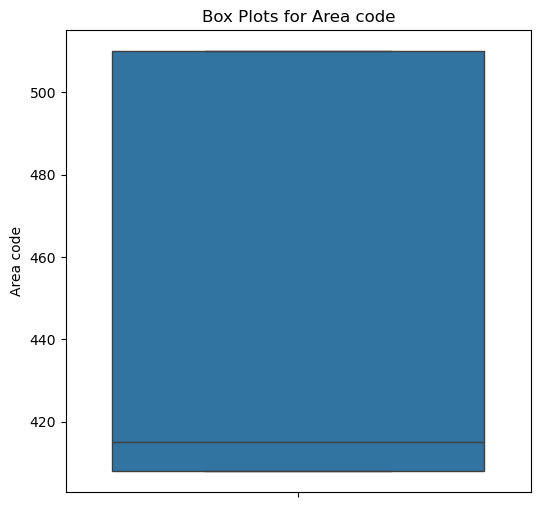

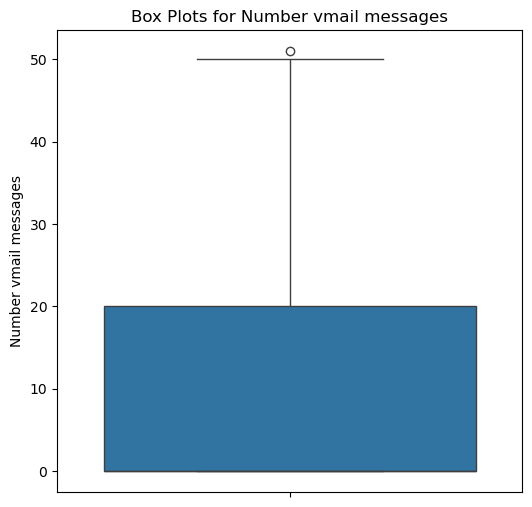

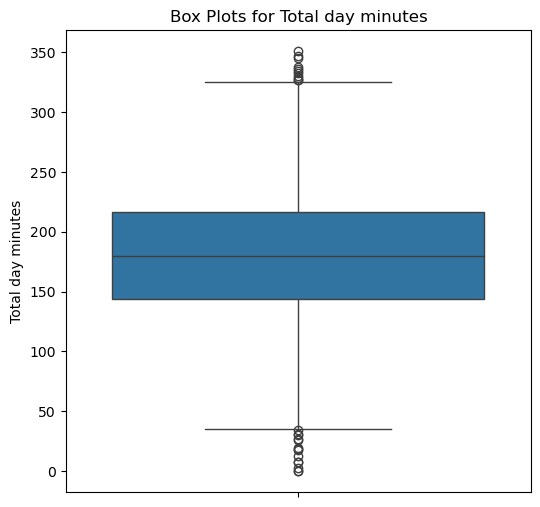

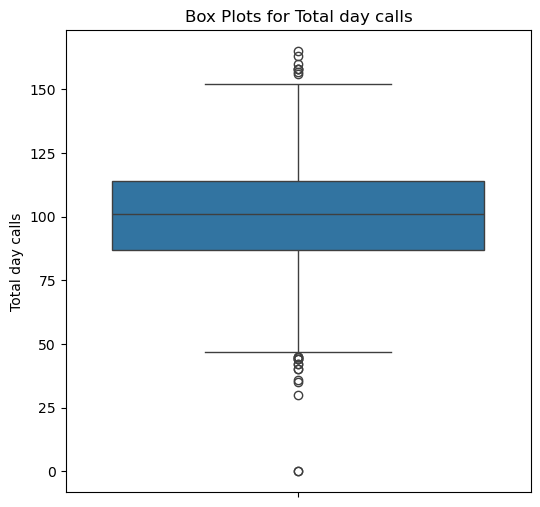

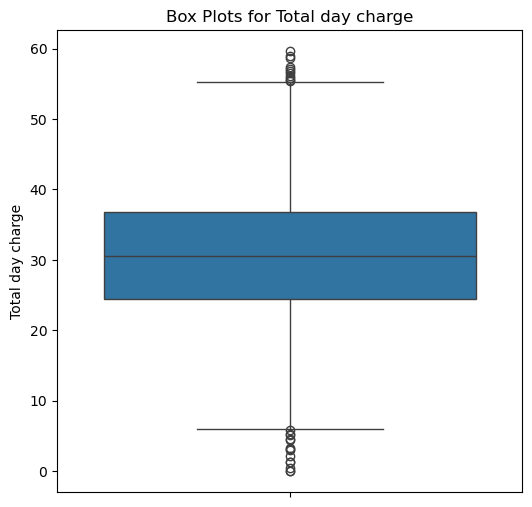

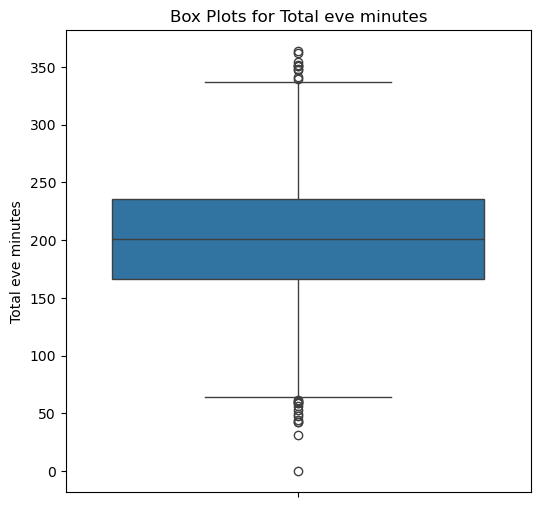

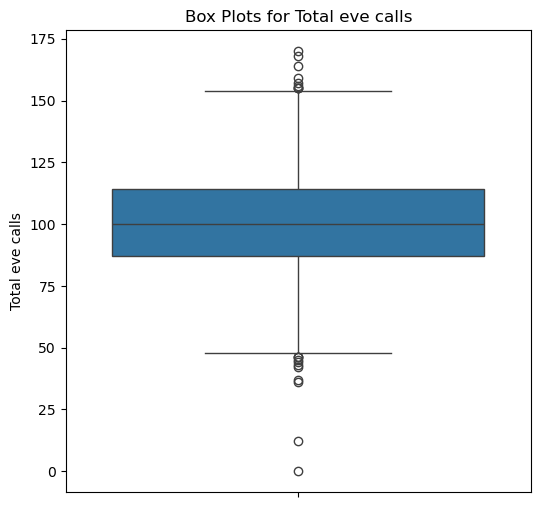

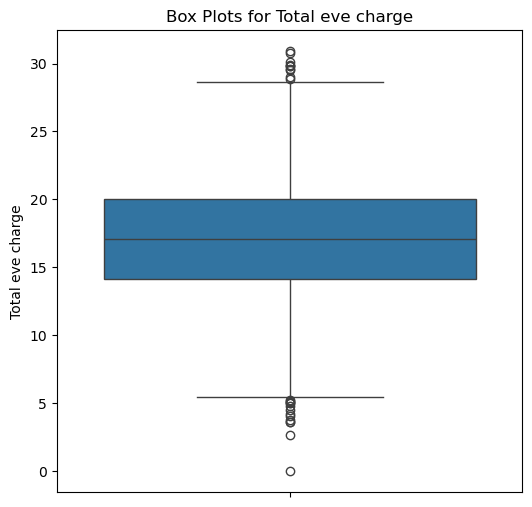

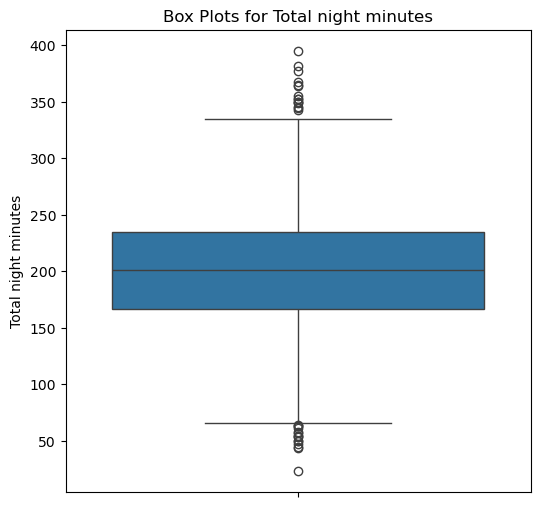

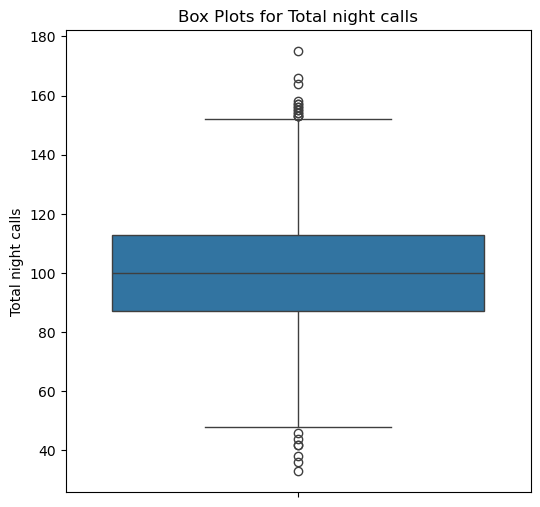

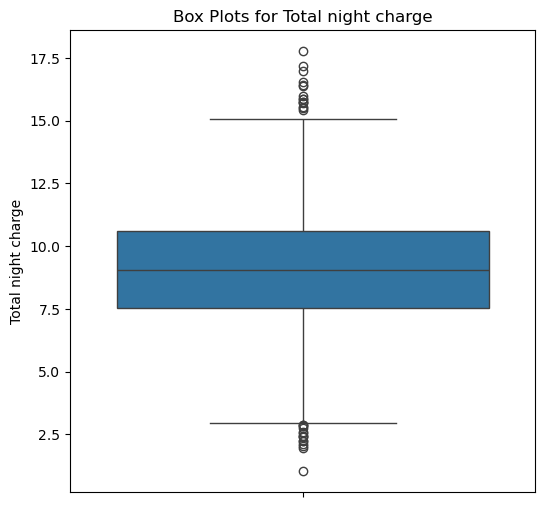

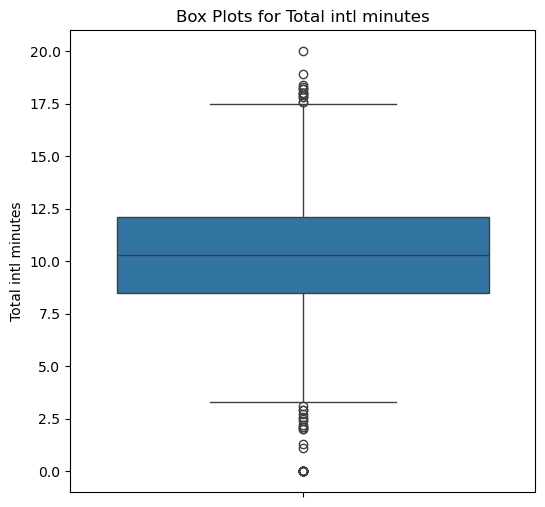

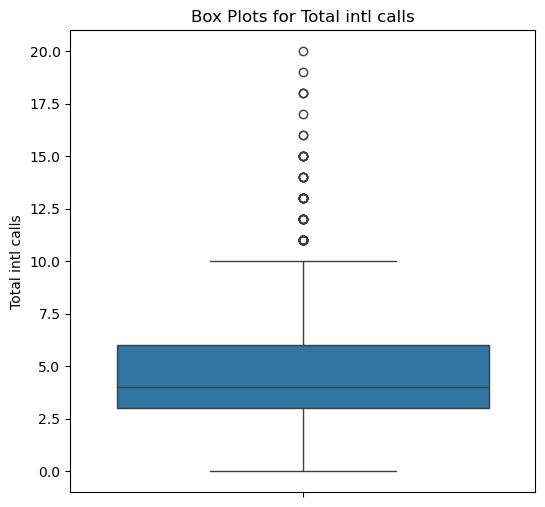

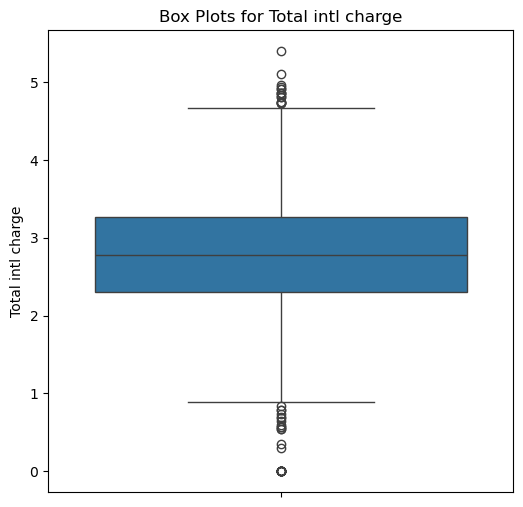

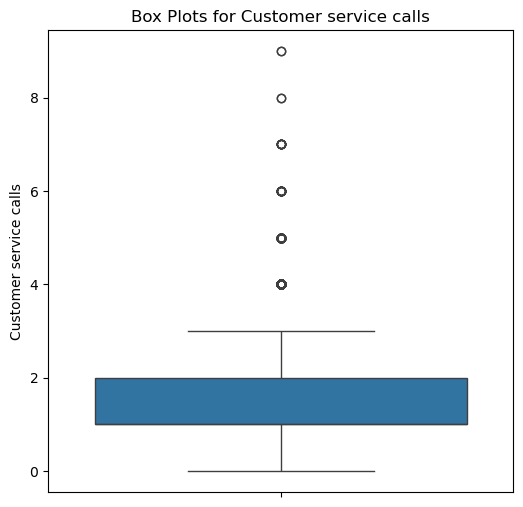

In [27]:
# Visualizing code of box plot for each columns to know the data distibution
for col in quant_Col:
    boxplot(data,col)

In [28]:
for col in quant_Col:
    outliers = detect_outliers_iqr(data, col)  # Get outliers
    print("---------------------------")
    print(f"\nFor column '{col}':")
   
    if not outliers.empty:
        print(f"Number of outliers detected: {outliers.shape[0]}")
        
        print(outliers[[col]].head()) 
      
    else:
        print("No outliers detected.")

---------------------------

For column 'Account length':
Number of outliers detected: 18
      Account length
246              209
338              224
644              243
864              210
1092             212
---------------------------

For column 'Area code':
No outliers detected.
---------------------------

For column 'Number vmail messages':
Number of outliers detected: 1
      Number vmail messages
2843                     51
---------------------------

For column 'Total day minutes':
Number of outliers detected: 25
     Total day minutes
128              337.4
296              350.8
485              335.5
540               30.9
582               34.0
---------------------------

For column 'Total day calls':
Number of outliers detected: 23
      Total day calls
252               158
544                36
581                40
836               158
1040               42
---------------------------

For column 'Total day charge':
Number of outliers detected: 25
     Total 

<span style="color:#FF8C00; font-size:35px"><b> 3. Data Preparation </b> </span><br>

In [29]:
le=LabelEncoder()
ce=LabelEncoder()
custom_order = ['Yes', 'No']
le.fit(custom_order)
data["International plan"] = le.transform(data["International plan"])
data["Voice mail plan"] = le.transform(data["Voice mail plan"])



In [30]:
cat=[]
custom_order = ['No', 'Yes']
ce.fit(custom_order)
cat=ce.transform(custom_order)

In [31]:
cat

array([0, 1])

In [32]:
cat=[]
cat=le.transform(custom_order)
cat

array([0, 1])

In [33]:
custom_order = ['True', 'False']  
le1 = LabelEncoder()
le1.fit(custom_order)
data['Churn'] = le1.transform(data['Churn'])

In [34]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


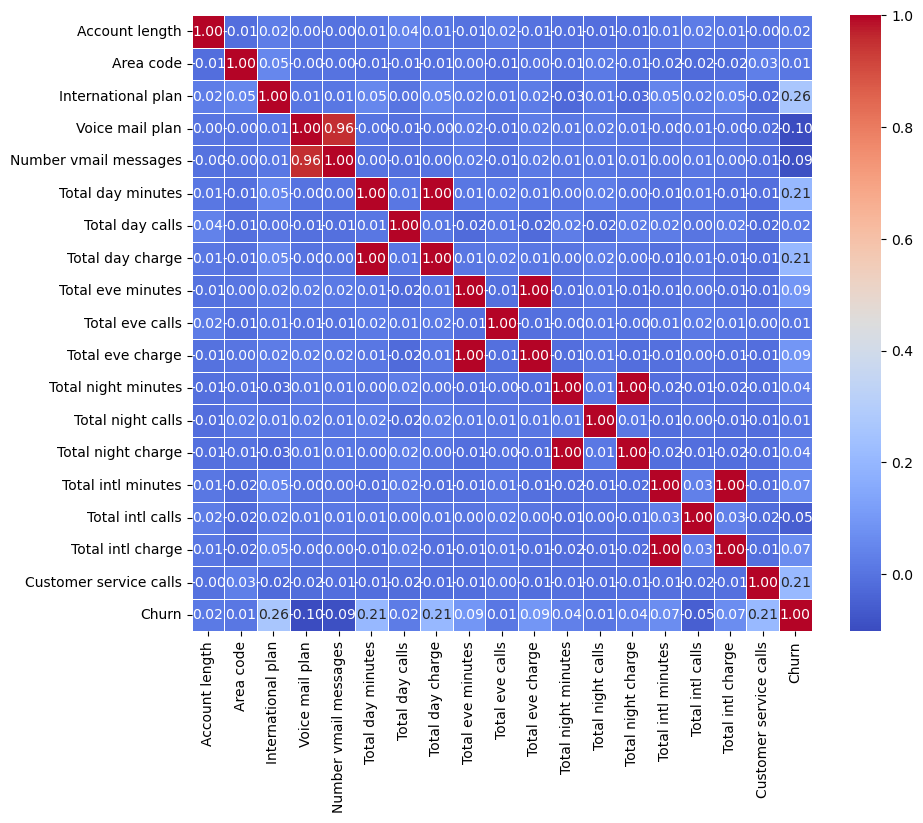

In [35]:
# Compute the correlation
numeric_df = data.select_dtypes(include=[np.number])
corr = numeric_df.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', annot=True, linewidths=.5)
plt.show()

Multicollinearity occurs when predictor variables are highly correlated, making it difficult for a model to distinguish the unique contribution of each feature. This leads to numerical instability, inflated standard errors, and unreliable coefficient estimates. As a result, the model may struggle with interpretation and generalization, potentially overfitting the data.

In [36]:
to_drop = ['State', 'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes','Number vmail messages']

In [37]:
data.drop(to_drop, axis = 1, inplace = True)

In [38]:
print('Dataset after Dropping columns:')
data.head()

Dataset after Dropping columns:


,Account length,Area code,International plan,Voice mail plan,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,107,415,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,137,415,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,84,408,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,75,415,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [39]:
data.shape

(3333, 14)

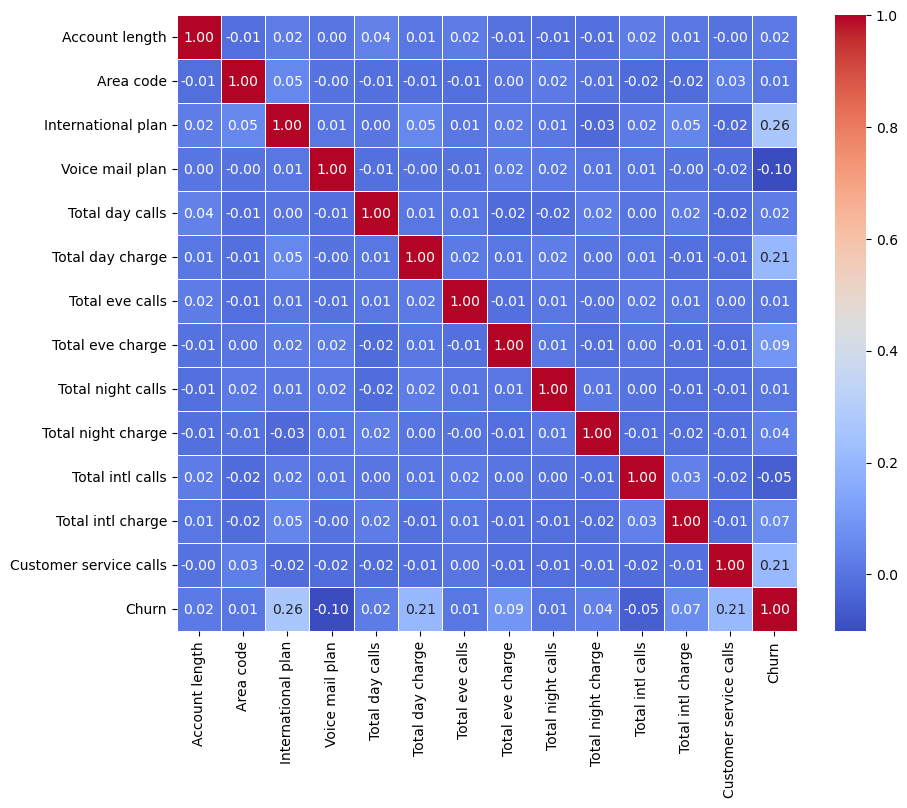

In [40]:
numeric_df = data.select_dtypes(include=[np.number])
corr = numeric_df.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', annot=True, linewidths=.5)
plt.show()

In [41]:
data.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Total day calls', 'Total day charge', 'Total eve calls',
       'Total eve charge', 'Total night calls', 'Total night charge',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

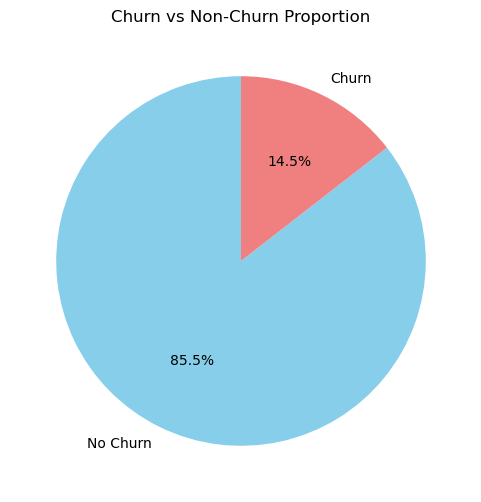

In [42]:
# Calculate the proportion of Churn vs Non-Churn
churn_counts = data['Churn'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Churn vs Non-Churn Proportion')
plt.show()


14.5 % in the churn rate is means that about 1 in 6 customers in the dataset has churned.
this data is umbalanced
-->Le SMOTE


In [43]:
X = data.drop('Churn', axis=1)  
y = data['Churn']  

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [45]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [46]:
X_train_resampled.shape

(4552, 13)

In [47]:
y_train_resampled.shape

(4552,)

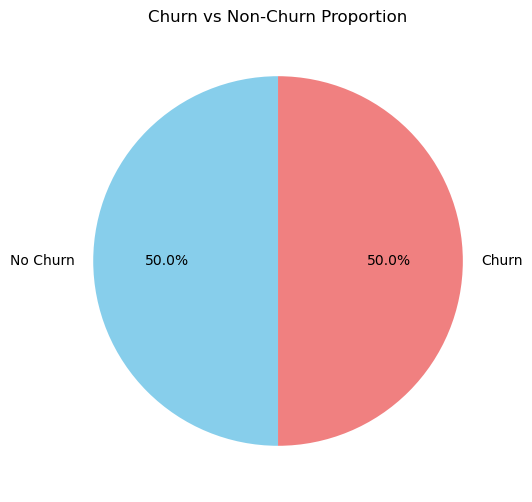

In [48]:
churn_counts = y_train_resampled.value_counts()
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Churn vs Non-Churn Proportion')
plt.show()


In [49]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)

In [50]:
X_test_scaled = scaler.fit_transform(X_test)

<span style="color:#FF8C00; font-size:35px"><b> 4. Modeling and Evaluation</b> </span><br>

###  KNN

In [51]:
param_grid = {'n_neighbors': range(1, 20), 'metric':['euclidean', 'manhattan', 'minkowski'], 'weights':['uniform', 'distance']}
# Application de GridSearchCV avec validation croisée
grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [52]:
grid_KNN.fit(X_train_scaled, y_train_resampled)
print(grid_KNN.best_params_)

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}


In [53]:
KNN_model = grid_KNN.best_estimator_

In [54]:
KNN_model

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

In [55]:
KNN_model.fit(X_train_scaled, y_train_resampled)
print('train score = ', KNN_model.score(X_train_scaled, y_train_resampled))
print('test score = ', KNN_model.score(X_test_scaled, y_test))
print(f'Score du modèle KNN avec 2 voisins : {KNN_model.score(X_test_scaled, y_test)}')

train score =  0.9947275922671354
test score =  0.7766116941529235
Score du modèle KNN avec 2 voisins : 0.7766116941529235


In [56]:
y_pred_knn = KNN_model.predict(X_test_scaled)
prob_y_pred_knn = KNN_model.predict_proba(X_test_scaled)[:, 1]
# Précision, rappel et F1-score pour KNN
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86       574
           1       0.32      0.54      0.40        93

    accuracy                           0.78       667
   macro avg       0.62      0.68      0.63       667
weighted avg       0.83      0.78      0.80       667



In [57]:
auc_Knn = np.round(roc_auc_score(y_test, prob_y_pred_knn), 3)
print("Auc KNN {}".format(auc_Knn))
print(auc_Knn)

Auc KNN 0.696
0.696


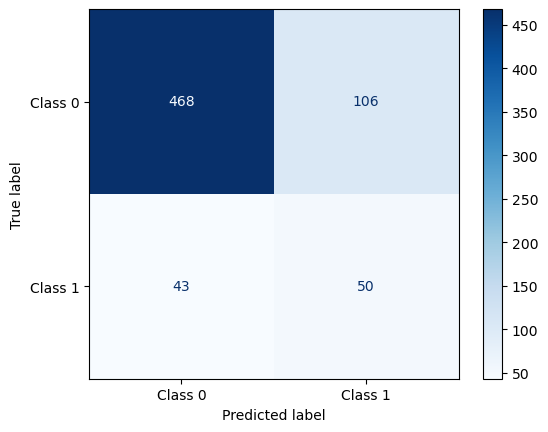

<Figure size 600x500 with 0 Axes>

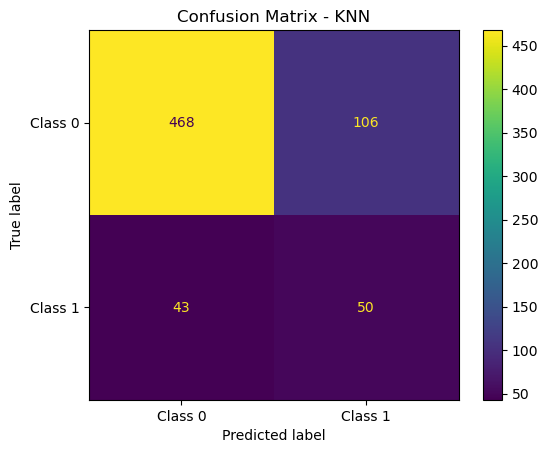

In [58]:
disp = ConfusionMatrixDisplay.from_estimator(KNN_model, X_test_scaled, y_test, display_labels=['Class 0', 'Class 1'], cmap='Blues')
plt.figure(figsize=(6, 5))
disp.plot()
plt.title('Confusion Matrix - KNN')
plt.show()

### LogisticRegression

In [59]:
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # Solver compatible with l1 penalty
}

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_resampled)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Accuracy: 0.7223251830496616


In [60]:
logreg_model = grid_search.best_estimator_

In [61]:
logreg_model

LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [97]:
prob_y_pred_lg = logreg_model.predict_proba(X_test_scaled)[:, 1]
logreg_model.fit(X_train_scaled, y_train_resampled)
print('train score = ', logreg_model.score(X_train_scaled, y_train_resampled))
print('test score = ', logreg_model.score(X_test_scaled, y_test))
y_pred_LG = logreg_model.predict(X_test_scaled)
# Précision, rappel et F1-score pour LG
print(classification_report(y_test, y_pred_LG))
auc_LG = np.round(roc_auc_score(y_test, prob_y_pred_lg), 3)
print("Auc LG {}".format(auc_LG))
print(auc_LG)

train score =  0.7271528998242531
test score =  0.5592203898050975
              precision    recall  f1-score   support

           0       0.95      0.52      0.67       574
           1       0.22      0.83      0.34        93

    accuracy                           0.56       667
   macro avg       0.58      0.67      0.51       667
weighted avg       0.85      0.56      0.62       667

Auc LG 0.756
0.756


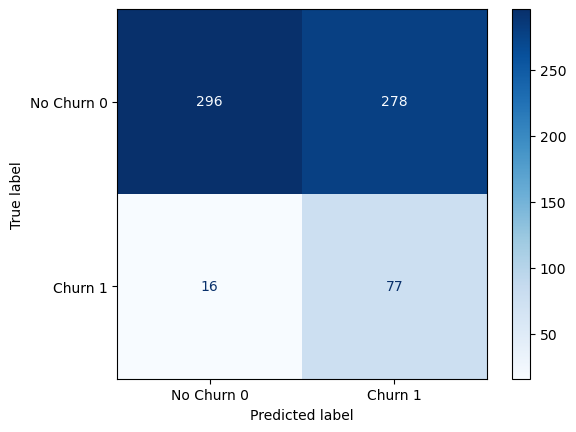

<Figure size 600x500 with 0 Axes>

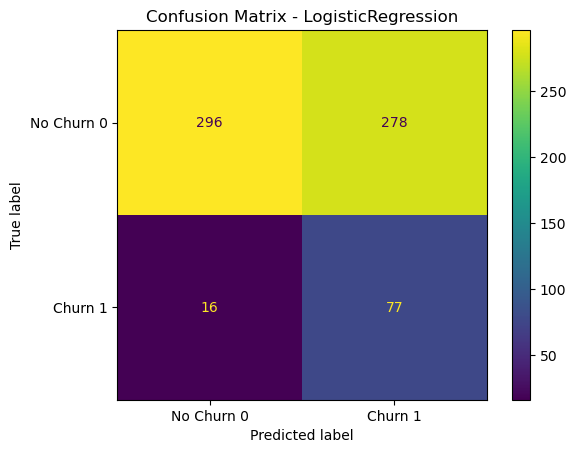

In [63]:
disp = ConfusionMatrixDisplay.from_estimator(logreg_model, X_test_scaled, y_test, display_labels=['No Churn 0', 'Churn 1'], cmap='Blues')
plt.figure(figsize=(6, 5))
disp.plot()
plt.title('Confusion Matrix - LogisticRegression')
plt.show()

### RandomForestClassifier

In [64]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether to bootstrap samples
}

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_resampled)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.9213567990735939


In [65]:
rf_clf_model = grid_search.best_estimator_
rf_clf_model

RandomForestClassifier(bootstrap=False, n_estimators=200, random_state=42)

In [66]:
prob_y_pred_rf = rf_clf_model.predict_proba(X_test_scaled)[:, 1]
rf_clf_model.fit(X_train_scaled, y_train_resampled)
print('train score = ', rf_clf_model.score(X_train_scaled, y_train_resampled))
print('test score = ', rf_clf_model.score(X_test_scaled, y_test))
y_pred_rf_clf = rf_clf_model.predict(X_test_scaled)
# Précision, rappel et F1-score pour LG
print(classification_report(y_test, y_pred_rf_clf))
auc_rf_clf = np.round(roc_auc_score(y_test, prob_y_pred_rf), 3)
print("Auc rf_clf {}".format(auc_rf_clf))
print(auc_rf_clf)

train score =  1.0
test score =  0.8365817091454273
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       574
           1       0.44      0.69      0.54        93

    accuracy                           0.84       667
   macro avg       0.69      0.77      0.72       667
weighted avg       0.87      0.84      0.85       667

Auc rf_clf 0.837
0.837


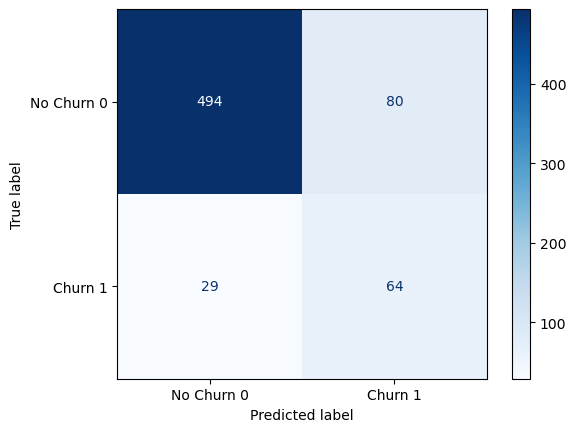

<Figure size 600x500 with 0 Axes>

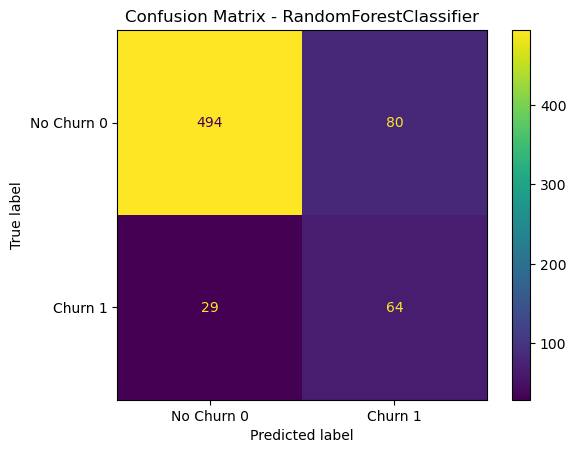

In [67]:
disp = ConfusionMatrixDisplay.from_estimator(rf_clf_model, X_test_scaled, y_test, display_labels=['No Churn 0', 'Churn 1'], cmap='Blues')
plt.figure(figsize=(6, 5))
disp.plot()
plt.title('Confusion Matrix - RandomForestClassifier')
plt.show()

### DecisionTree

In [68]:
# Define parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split quality metrics
    'splitter': ['best', 'random'],   # Strategy for choosing the split at each node
    'max_depth': range(1,30),  # Maximum depth of the tree ,
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required to be at a leaf node
}

# Initialize Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_resampled)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 1044 candidates, totalling 5220 fits


Best Parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best CV Accuracy: 0.8299648978902546


In [69]:
dt_clf_model = grid_search.best_estimator_
dt_clf_model

DecisionTreeClassifier(criterion='entropy', max_depth=21, random_state=42)

In [70]:
prob_y_pred_Dt = dt_clf_model.predict_proba(X_test_scaled)[:, 1]
dt_clf_model.fit(X_train_scaled, y_train_resampled)
print('train score = ', dt_clf_model.score(X_train_scaled, y_train_resampled))
print('test score = ', dt_clf_model.score(X_test_scaled, y_test))
y_pred_dt_clf= logreg_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_dt_clf))
auc_dt_clf = np.round(roc_auc_score(y_test, prob_y_pred_Dt), 3)
print("Auc Dt_clf {}".format(auc_dt_clf))
print(auc_dt_clf)

train score =  0.9973637961335676
test score =  0.7331334332833583
              precision    recall  f1-score   support

           0       0.95      0.52      0.67       574
           1       0.22      0.83      0.34        93

    accuracy                           0.56       667
   macro avg       0.58      0.67      0.51       667
weighted avg       0.85      0.56      0.62       667

Auc Dt_clf 0.731
0.731


In [71]:
# Plot ROC curve for each model
#plt.figure(figsize=(7, 5))

#for model in ['Logist','RandomF','Tree' ,'GBM','Knn']:
 #   fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
  #  roc_auc = auc(fpr, tpr)
   # plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

# Plot random guess line
#plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Curves ')
#plt.legend()
#plt.show()

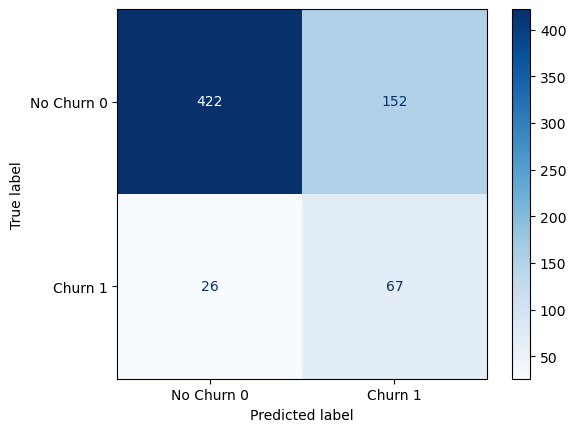

<Figure size 600x500 with 0 Axes>

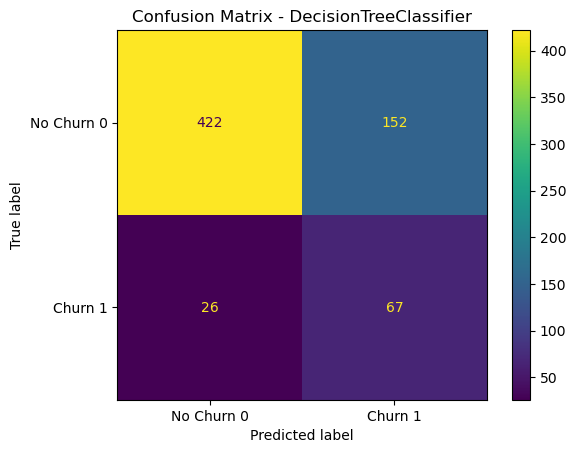

In [72]:
disp = ConfusionMatrixDisplay.from_estimator(dt_clf_model, X_test_scaled, y_test, display_labels=['No Churn 0', 'Churn 1'], cmap='Blues')
plt.figure(figsize=(6, 5))
disp.plot()
plt.title('Confusion Matrix - DecisionTreeClassifier')
plt.show()

In [73]:
# # Visualisation de l'arbre de décision
# plt.figure(figsize=(100,100), dpi = 200)  # Augmenter la taille de la figure
# plot_tree(dt_clf_model,
#           filled=True,
#           feature_names=X_test_scaled,  # Noms des caractéristiques
#           class_names=["No Churn 0", "Churn 1"],  # Noms des classes
#           rounded=True,
#           fontsize=14)  # Augmenter la taille de la police

# plt.tight_layout()
# plt.savefig("tree_model.png", dpi = 200)
# plt.show()


In [74]:
print(export_text(dt_clf_model, feature_names=['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Total day calls', 'Total day charge', 'Total eve calls',
       'Total eve charge', 'Total night calls', 'Total night charge',
       'Total intl calls', 'Total intl charge', 'Customer service calls'], show_weights=True))

|--- Voice mail plan <= 0.50
|   |--- Total day charge <= 0.68
|   |   |--- Customer service calls <= 1.25
|   |   |   |--- Total intl calls <= -0.25
|   |   |   |   |--- International plan <= 0.50
|   |   |   |   |   |--- Total eve charge <= 0.38
|   |   |   |   |   |   |--- Customer service calls <= 0.75
|   |   |   |   |   |   |   |--- Account length <= -0.23
|   |   |   |   |   |   |   |   |--- Account length <= -1.18
|   |   |   |   |   |   |   |   |   |--- Total eve calls <= -0.40
|   |   |   |   |   |   |   |   |   |   |--- Total eve calls <= -0.94
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- Total eve calls >  -0.94
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 15.00] class: 1
|   |   |   |   |   |   |   |   |   |--- Total eve calls >  -0.40
|   |   |   |   |   |   |   |   |   |   |--- Total night charge <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of 

In [75]:
# y_pred_dt = dt_clf_model.predict(X_test_scaled)
# # Précision, rappel et F1-score pour KNN
# print(classification_report(y_test, y_pred_dt))

### Gradient Boosting

In [98]:
# Define parameter grid for Gradient Boosting
param_grid = {
    'max_depth': [5,10,15,20,25,30],  # Maximum depth of the individual trees
    'max_leaf_nodes':[3,5,6,8,10] ,
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [3,6,8,10],  # Minimum samples required to be at a leaf node
    'learning_rate':[0.1,0.4,0.6,1],
    'max_depth':[4,6,8,10],
    'n_estimators':[100,200,300]
  }

# # # Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# # GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_resampled)

# # Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


KeyboardInterrupt: 

In [ ]:
gb_clf_model1 = grid_search.best_estimator_
gb_clf_model1 

In [ ]:
y_pred_gb_clf = gb_clf_model1 .predict(X_test_scaled)
# Précision, rappel et F1-score pour KNN
print(classification_report(y_test, y_pred_gb_clf))

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(gb_clf_model1, X_test_scaled, y_test, display_labels=['Class 0', 'Class 1'], cmap='Blues')
plt.figure(figsize=(6, 5))
disp.plot()
plt.title('GradientBoostingClassifier')
plt.show()

In [80]:
gb_model = GradientBoostingClassifier(max_depth=6, max_leaf_nodes=7, min_samples_leaf=5,
                           random_state=42,min_samples_split= 2,n_estimators=300,learning_rate=0.5)


In [81]:
gb_model=GradientBoostingClassifier(learning_rate=0.6, max_depth=8, max_leaf_nodes=10,
                           min_samples_leaf=10, n_estimators=300,
                           random_state=42)

In [82]:
gb_model

GradientBoostingClassifier(learning_rate=0.6, max_depth=8, max_leaf_nodes=10,
                           min_samples_leaf=10, n_estimators=300,
                           random_state=42)

In [ ]:
gb_model.fit(X_train_scaled, y_train_resampled)
print('train score = ', gb_model.score(X_train_scaled, y_train_resampled))
print('test score = ', gb_model.score(X_test_scaled, y_test))

train score =  1.0
test score =  0.782608695652174


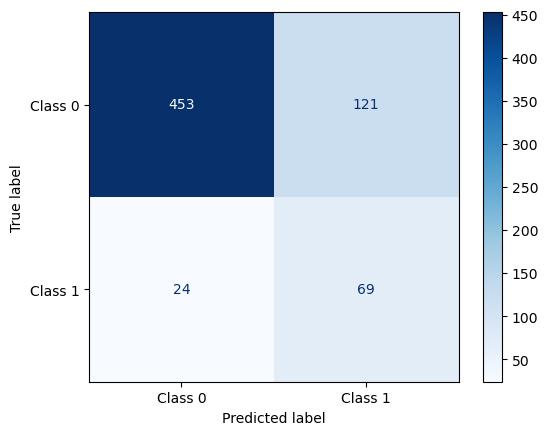

<Figure size 600x500 with 0 Axes>

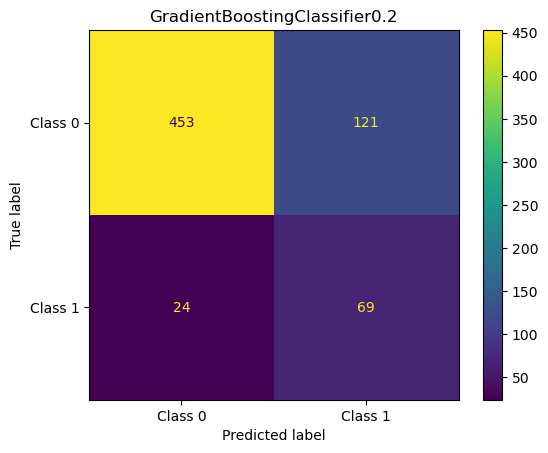

In [84]:
disp = ConfusionMatrixDisplay.from_estimator(gb_model, X_test_scaled, y_test, display_labels=['Class 0', 'Class 1'], cmap='Blues')
plt.figure(figsize=(6, 5))
disp.plot()
plt.title('GradientBoostingClassifier0.2')
plt.show()

In [85]:
prob_y_pred_Gbm = gb_model.predict_proba(X_test_scaled)[:, 1]
#y_pred_dt = gb_model.predict(X_test_scaled)
y_pred_gbm = gb_model .predict(X_test_scaled)
 #Précision, rappel et F1-score pour KNN
print(classification_report(y_test,y_pred_gbm))

auc_gb = np.round(roc_auc_score(y_test, prob_y_pred_Gbm), 3)
print("Auc GBM {}".format(auc_gb))
print(auc_gb)

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       574
           1       0.36      0.74      0.49        93

    accuracy                           0.78       667
   macro avg       0.66      0.77      0.67       667
weighted avg       0.87      0.78      0.81       667

Auc GBM 0.836
0.836


In [100]:
# gb_clf_model=grid_search.best_estimator_
# gb_clf_model


In [ ]:
# gb_clf_model.fit(X_train_scaled, y_train_resampled)
# print('train score = ', gb_clf_model.score(X_train_scaled, y_train_resampled))
# print('test score = ', gb_clf_model.score(X_test_scaled, y_test))

### Pipeline

In [88]:
# Logistic Regression Pipeline
logreg_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear'))
])

# Random Forest Pipeline with the best parameters incorporated
rf_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', RandomForestClassifier(bootstrap=False, n_estimators=200, random_state=42))
])

knn_pipeline= Pipeline([
('scaler', RobustScaler()),
    ('classifier', KNeighborsClassifier(metric='manhattan', n_neighbors=2))
    
])

# Random Forest Pipeline with the best parameters incorporated
dt_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=21, random_state=42))
])

# Gradient Boosting Pipeline with the best parameters incorporated
gb_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', GradientBoostingClassifier(learning_rate=0.6, max_depth=8, max_leaf_nodes=10,
                           min_samples_leaf=10, n_estimators=300,
                           random_state=42))
])
# Train Logistic Regression
logreg_pipeline.fit(X_train_scaled, y_train_resampled)
logreg_predictions = logreg_pipeline.predict(X_test_scaled)

# Train Random Forest
rf_pipeline.fit(X_train_scaled, y_train_resampled)
rf_predictions = rf_pipeline.predict(X_test_scaled)

# Train Decision Tree
dt_pipeline.fit(X_train_scaled, y_train_resampled)
dt_predictions = dt_pipeline.predict(X_test_scaled)

# Train Gradient Boosting
gb_pipeline.fit(X_train_scaled, y_train_resampled)
gb_predictions = gb_pipeline.predict(X_test_scaled)

# Train K-Nearest Neighbors
knn_pipeline.fit(X_train_scaled, y_train_resampled)
knn_predictions = knn_pipeline.predict(X_test_scaled)


In [89]:
# Train and predict using the models
logreg_pipeline.fit(X_train_scaled, y_train_resampled)
logreg_predictions = logreg_pipeline.predict(X_test_scaled)

rf_pipeline.fit(X_train_scaled, y_train_resampled)
rf_predictions = rf_pipeline.predict(X_test_scaled)

dt_pipeline.fit(X_train_scaled, y_train_resampled)
dt_predictions = dt_pipeline.predict(X_test_scaled)

gb_pipeline.fit(X_train_scaled, y_train_resampled)
gb_predictions = gb_pipeline.predict(X_test_scaled)

# Train and predict using KNN
knn_pipeline.fit(X_train_scaled, y_train_resampled)
knn_predictions = knn_pipeline.predict(X_test_scaled)

# Generate classification reports
logreg_report = classification_report(y_test, logreg_predictions, output_dict=True)
rf_report = classification_report(y_test, rf_predictions, output_dict=True)
dt_report = classification_report(y_test, dt_predictions, output_dict=True)
gb_report = classification_report(y_test, gb_predictions, output_dict=True)
knn_report = classification_report(y_test, knn_predictions, output_dict=True)

# Calculate accuracies
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
from sklearn.metrics import f1_score

# Assuming you have predicted values (y_pred) and true labels (y_true) for each model
logreg_f1_score = f1_score(y_test, logreg_predictions, average='weighted')
rf_f1_score = f1_score(y_test, rf_predictions, average='weighted')
dt_f1_score = f1_score(y_test, dt_predictions, average='weighted')
gb_f1_score = f1_score(y_test, gb_predictions, average='weighted')
knn_f1_score = f1_score(y_test, knn_predictions, average='weighted')


# Determine the best model based on accuracy
accuracies = {
    'Logistic Regression': logreg_accuracy,
    'Random Forest': rf_accuracy,
    'Decision Tree': dt_accuracy,
    'Gradient Boosting': gb_accuracy,
    'K-Nearest Neighbors': knn_accuracy
}
F1_scores = {
    'Logistic Regression': logreg_f1_score,
    'Random Forest': rf_f1_score,
    'Decision Tree': dt_f1_score,
    'Gradient Boosting': gb_f1_score,
    'K-Nearest Neighbors': knn_f1_score
}
# Determine the best model based on f1_score
best_model_name_f1score = max(F1_scores, key=F1_scores.get)

best_model_pipeline_f1score = None  # Initialize this variable
if best_model_name_f1score == 'Logistic Regression':
    best_model_predictions_f1score = logreg_predictions
    best_model_pipeline_f1score = logreg_pipeline
elif best_model_name_f1score == 'Random Forest':
    best_model_predictions_f1score = rf_predictions
    best_model_pipeline_f1score = rf_pipeline
elif best_model_name_f1score == 'Decision Tree':
    best_model_predictions_f1score = dt_predictions
    best_model_pipeline_f1score = dt_pipeline
elif best_model_name_f1score == 'Gradient Boosting':
    best_model_predictions_f1score = gb_predictions
    best_model_pipeline_f1score = gb_pipeline
elif best_model_name_f1score == 'K-Nearest Neighbors':
    best_model_predictions_f1score = knn_predictions
    best_model_pipeline_f1score = knn_pipeline

# Create the result_df DataFrame
# result_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': best_model_predictions
# })

# print(f"The best model is {best_model_name} with an accuracy of {accuracies[best_model_name]:.4f}")


# Determine the best model based on accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_model_pipeline = None  # Initialize this variable

if best_model_name == 'Logistic Regression':
    best_model_predictions = logreg_predictions
    best_model_pipeline = logreg_pipeline
elif best_model_name == 'Random Forest':
    best_model_predictions = rf_predictions
    best_model_pipeline = rf_pipeline
elif best_model_name == 'Decision Tree':
    best_model_predictions = dt_predictions
    best_model_pipeline = dt_pipeline
elif best_model_name == 'Gradient Boosting':
    best_model_predictions = gb_predictions
    best_model_pipeline = gb_pipeline
elif best_model_name == 'K-Nearest Neighbors':
    best_model_predictions = knn_predictions
    best_model_pipeline = knn_pipeline

# Create the result_df DataFrame
result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': best_model_predictions
})

print(f"The best model is {best_model_name} with an accuracy of {accuracies[best_model_name]:.4f}")
print(f"The best model is {best_model_name_f1score} with an f1_score of {F1_scores[best_model_name_f1score]:.4f}")


The best model is Random Forest with an accuracy of 0.8366
The best model is Random Forest with an f1_score of 0.8504


<span style="color:#FF8C00; font-size:35px"><b> 5. Comparing Models</b> </span><br>

In [90]:
# Sort the models by accuracy in descending order
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

# Print models from best to worst
print("Model Rankings from Best accuracy to Worst:")
for model, accuracy in sorted_accuracies:
    print(f"{model}: {accuracy:.4f}")
# Sort the models by accuracy in descending order
sorted_F1scores = sorted(F1_scores.items(), key=lambda x: x[1], reverse=True)
print("------------------------")
# Print models from best to worst
print("Model Rankings from Best f1score to Worst:")
for model, f1score in sorted_F1scores:
    print(f"{model}: {f1score:.4f}")

Model Rankings from Best accuracy to Worst:
Random Forest: 0.8366
Gradient Boosting: 0.7826
K-Nearest Neighbors: 0.7766
Decision Tree: 0.7331
Logistic Regression: 0.5592
------------------------
Model Rankings from Best f1score to Worst:
Random Forest: 0.8504
Gradient Boosting: 0.8098
K-Nearest Neighbors: 0.7984
Decision Tree: 0.7706
Logistic Regression: 0.6229


In [91]:
prob_y_pred_lg = logreg_model.predict_proba(X_test_scaled)[:, 1]
prob_y_pred_rf = rf_clf_model.predict_proba(X_test_scaled)[:, 1]
prob_y_pred_Dt = dt_clf_model.predict_proba(X_test_scaled)[:, 1]
prob_y_pred_Gbm = gb_model.predict_proba(X_test_scaled)[:, 1]
prob_y_pred_knn = KNN_model.predict_proba(X_test_scaled)[:, 1]


In [92]:
# Create a DataFrame
test_df = pd.DataFrame(
    {'True': y_test, 'Logist':prob_y_pred_lg,'RandomF':prob_y_pred_rf ,'Tree':prob_y_pred_Dt ,'GBM':prob_y_pred_Gbm,'Knn':prob_y_pred_knn})

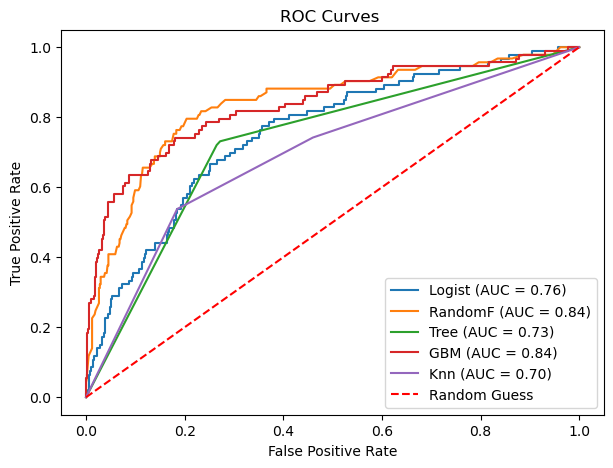

In [93]:
# Plot ROC curve for each model
plt.figure(figsize=(7, 5))

for model in ['Logist','RandomF','Tree' ,'GBM','Knn']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves ')
plt.legend()
plt.show()

**Feature Importance**: Understanding which features are most influential in predicting churn can be enlightening. By employing our best model to derive feature importances, we gain insights into which aspects of the customer experience or service have the most significant impact on retention decisions.

Text(0.5, 1.0, 'Variable importance')

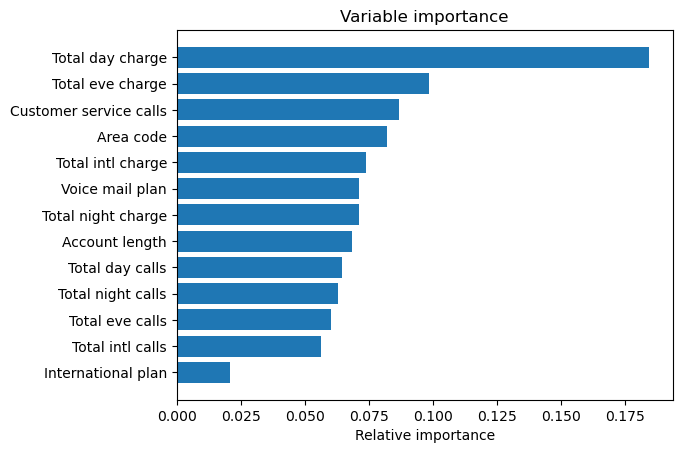

In [94]:
importances = rf_clf_model.feature_importances_
importances
sorted_idx = np.argsort(importances)
features = ['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Total day calls', 'Total day charge', 'Total eve calls',
       'Total eve charge', 'Total night calls', 'Total night charge',
       'Total intl calls', 'Total intl charge', 'Customer service calls']
features_arr = np.asarray(features)
padding=np.arange(X_train_scaled.size/len(X_train_scaled))
plt.barh(padding,importances[sorted_idx],align='center')
plt.yticks(padding,features_arr[sorted_idx])
plt.xlabel('Relative importance')
plt.title('Variable importance')


In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Modèle SVM
model_svm = SVC(random_state=42)

# Définir une grille de paramètres
param_grid_svm = {
    'C': [0.1, 1, 10],         # Paramètre de régularisation
    'gamma': ['scale', 0.01, 0.1, 1],  # Coefficient du noyau RBF
    'kernel': ['linear', 'rbf'],       # Noyaux possibles
}

# Recherche en grille
grid_search_svm = GridSearchCV(estimator=model_svm, param_grid=param_grid_svm, 
                               scoring='accuracy', cv=3, verbose=1)

# Entraîner avec la recherche des meilleurs paramètres
grid_search_svm.fit(X_train_scaled, y_train_resampled)

# Meilleurs hyperparamètres et précision associée
print(f"Meilleurs paramètres SVM : {grid_search_svm.best_params_}")
best_svm_model = grid_search_svm.best_estimator_

# Prédictions et évaluation
y_pred_svm = best_svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Précision avec SVM optimisé : {accuracy_svm:.2f}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Meilleurs paramètres SVM : {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Précision avec SVM optimisé : 0.85
